In [1]:
# Install the gradio_client package if not already installed
!pip install gradio_client --quiet

# Import necessary libraries
import os
from tqdm import tqdm
from gradio_client import Client, handle_file
import pandas as pd

# Initialize the Moondream2 API client
client = Client("vikhyatk/moondream2")

# Define the test set directory
test_set_directory = "D:/test"  # Adjust path as needed
output_csv = "moondream2_predictions.csv"  # File to save the predictions

# Function to predict age and gender for an image using Moondream2
def predict_age_gender(image_path):
    try:
        result = client.predict(
            img=handle_file(image_path),
            prompt="Predict age and gender from this image.",
            api_name="/answer_question"
        )
        return result  # The response from the API
    except Exception as e:
        return f"Error: {e}"

# Prepare a list to store predictions
predictions = []

# Loop through images in the test set directory
print("Processing images for age and gender prediction...")
for filename in tqdm(os.listdir(test_set_directory)):
    image_path = os.path.join(test_set_directory, filename)
    
    if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Get the image ID (assuming filenames like "123.png")
        image_id = os.path.splitext(filename)[0]
        
        # Predict age and gender
        prediction = predict_age_gender(image_path)
        
        # Append the results to the predictions list
        predictions.append({
            "Image ID": image_id,
            "Prediction": prediction
        })

# Convert predictions to a pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Save predictions to a CSV file
df_predictions.to_csv(output_csv, index=False)
print(f"Predictions saved to {output_csv}")


Loaded as API: https://vikhyatk-moondream2.hf.space ✔
Processing images for age and gender prediction...


100%|██████████| 79/79 [05:54<00:00,  4.48s/it]

Predictions saved to moondream2_predictions.csv


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.88      0.64        41
           1       0.38      0.08      0.13        38

    accuracy                           0.49        79
   macro avg       0.44      0.48      0.39        79
weighted avg       0.44      0.49      0.40        79

Confusion Matrix:
[[36  5]
 [35  3]]


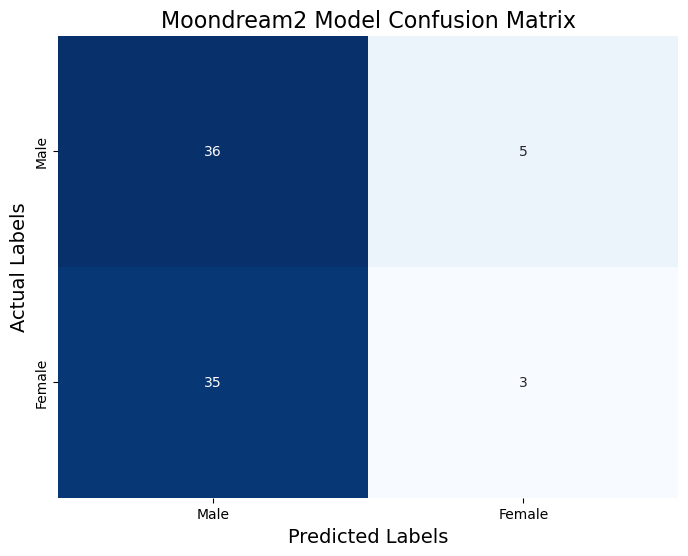

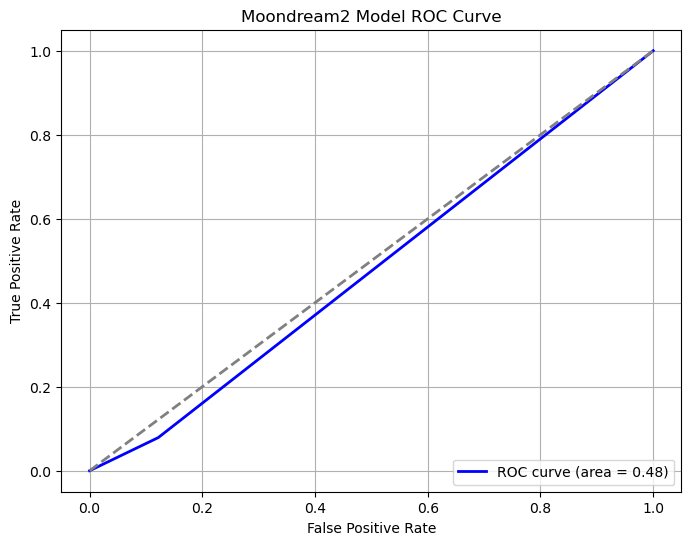

In [1]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score, 
    recall_score, f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "C:/Users\Salem Shamsul Alam/Desktop/Research Work/Age and Gender/Experiments/moondream2_predictions_2.csv"
data = pd.read_csv(file_path)

# Extract columns
image_ids = data.iloc[:, 0]  # First column (Image IDs)
actual_labels = data.iloc[:, 1]  # Second column (Actual Gender Labels)
predicted_labels = data.iloc[:, 2]  # Third column (Predicted Gender Labels)

# Calculate metrics
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(actual_labels, predicted_labels))
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Male', 'Female'], 
            yticklabels=['Male', 'Female'])
plt.title('Moondream2 Model Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.savefig('Moondream2 Model Confusion Matrix.png', bbox_inches='tight')  # Save the figure
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(actual_labels, data.iloc[:, 2])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Moondream2 Model ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('Moondream2 Model ROC Curve.png', bbox_inches='tight')  # Save the figure
plt.show()
